Data Science Solutions with Python by Tshepo Chris Nokeri, Apress. 2021

# CHAPTER 6: TREE MODELLING AND GRADIENT BOOSTING WITH SCIKIT-LEARN, XGBOOST, PYSPARK, AND H2O

This chapter executes and appraises a tree-based method (the decision tree method) and
ensemble method (the gradient boosting trees method) using a diverse set of
comprehensive Python frameworks (i.e., SciKit-Learn, XGBoost, PySpark, and
H2O). At the outset, it sufficiently clarifies how decision trees compute the probabilities of
classes.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
sns.set("talk","ticks",font_scale=1, font="Calibri")

# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\i5 lenov\Downloads\banking.csv")
drop_column_names = df.columns[[8, 9, 10]]
initial_data = df.drop(drop_column_names, axis="columns")
initial_data.iloc[::, 1] = pd.get_dummies(initial_data.iloc[::, 1])
initial_data.iloc[::, 2] = pd.get_dummies(initial_data.iloc[::, 2])
initial_data.iloc[::, 3] = pd.get_dummies(initial_data.iloc[::, 3])
initial_data.iloc[::, 4] = pd.get_dummies(initial_data.iloc[::, 4])
initial_data.iloc[::, 5] = pd.get_dummies(initial_data.iloc[::, 5])
initial_data.iloc[::, 6] = pd.get_dummies(initial_data.iloc[::, 6])
initial_data.iloc[::, 7] = pd.get_dummies(initial_data.iloc[::, 7])
initial_data.iloc[::, 11] = pd.get_dummies(initial_data.iloc[::, 11])
initial_data = initial_data.dropna()
x = np.array(initial_data.iloc[::,0:17])
y = np.array(initial_data.iloc[::,-1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
sk_standard_scaler = StandardScaler()
sk_standard_scaled_x_train = sk_standard_scaler.fit_transform(x_train)
sk_standard_scaled_x_test = sk_standard_scaler.transform(x_test)

# SciKit-Learn in Action

In [3]:
from sklearn.tree import DecisionTreeClassifier
sk_decision_tree_method = DecisionTreeClassifier()
sk_decision_tree_method.fit(sk_standard_scaled_x_train, y_train)

DecisionTreeClassifier()

In [4]:
from sklearn.model_selection import GridSearchCV
sk_decision_tree_method_parameters = {"criterion":("gini","entropy"), "max_depth":[1, 2, 3, 4, 5, 6]}
sk_decision_tree_method_g_search = GridSearchCV(estimator = sk_decision_tree_method, param_grid = sk_decision_tree_method_parameters)
sk_decision_tree_method_g_search.fit(sk_standard_scaled_x_train, y_train)
print("Best decision tree regression score: ", sk_decision_tree_method_g_search.best_score_)
print("Best decision tree parameter: ", sk_decision_tree_method_g_search.best_params_)

Best decision tree regression score:  0.900030349013657
Best decision tree parameter:  {'criterion': 'entropy', 'max_depth': 5}


In [5]:
sk_decision_tree_method = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
sk_decision_tree_method.fit(sk_standard_scaled_x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [6]:
from sklearn import metrics
sk_yhat = sk_decision_tree_method.predict(sk_standard_scaled_x_test)
sk_decision_tree_method_assessment_2 = pd.DataFrame(metrics.classification_report(y_test, sk_yhat, output_dict=True)).transpose()
sk_decision_tree_method_assessment_2

,precision,recall,f1-score,support
0,0.914696,0.982253,0.947271,7325.000000
1,0.650538,0.265060,0.376654,913.000000
accuracy,0.902768,0.902768,0.902768,0.902768
macro avg,0.782617,0.623656,0.661963,8238.000000
weighted avg,0.885420,0.902768,0.884031,8238.000000


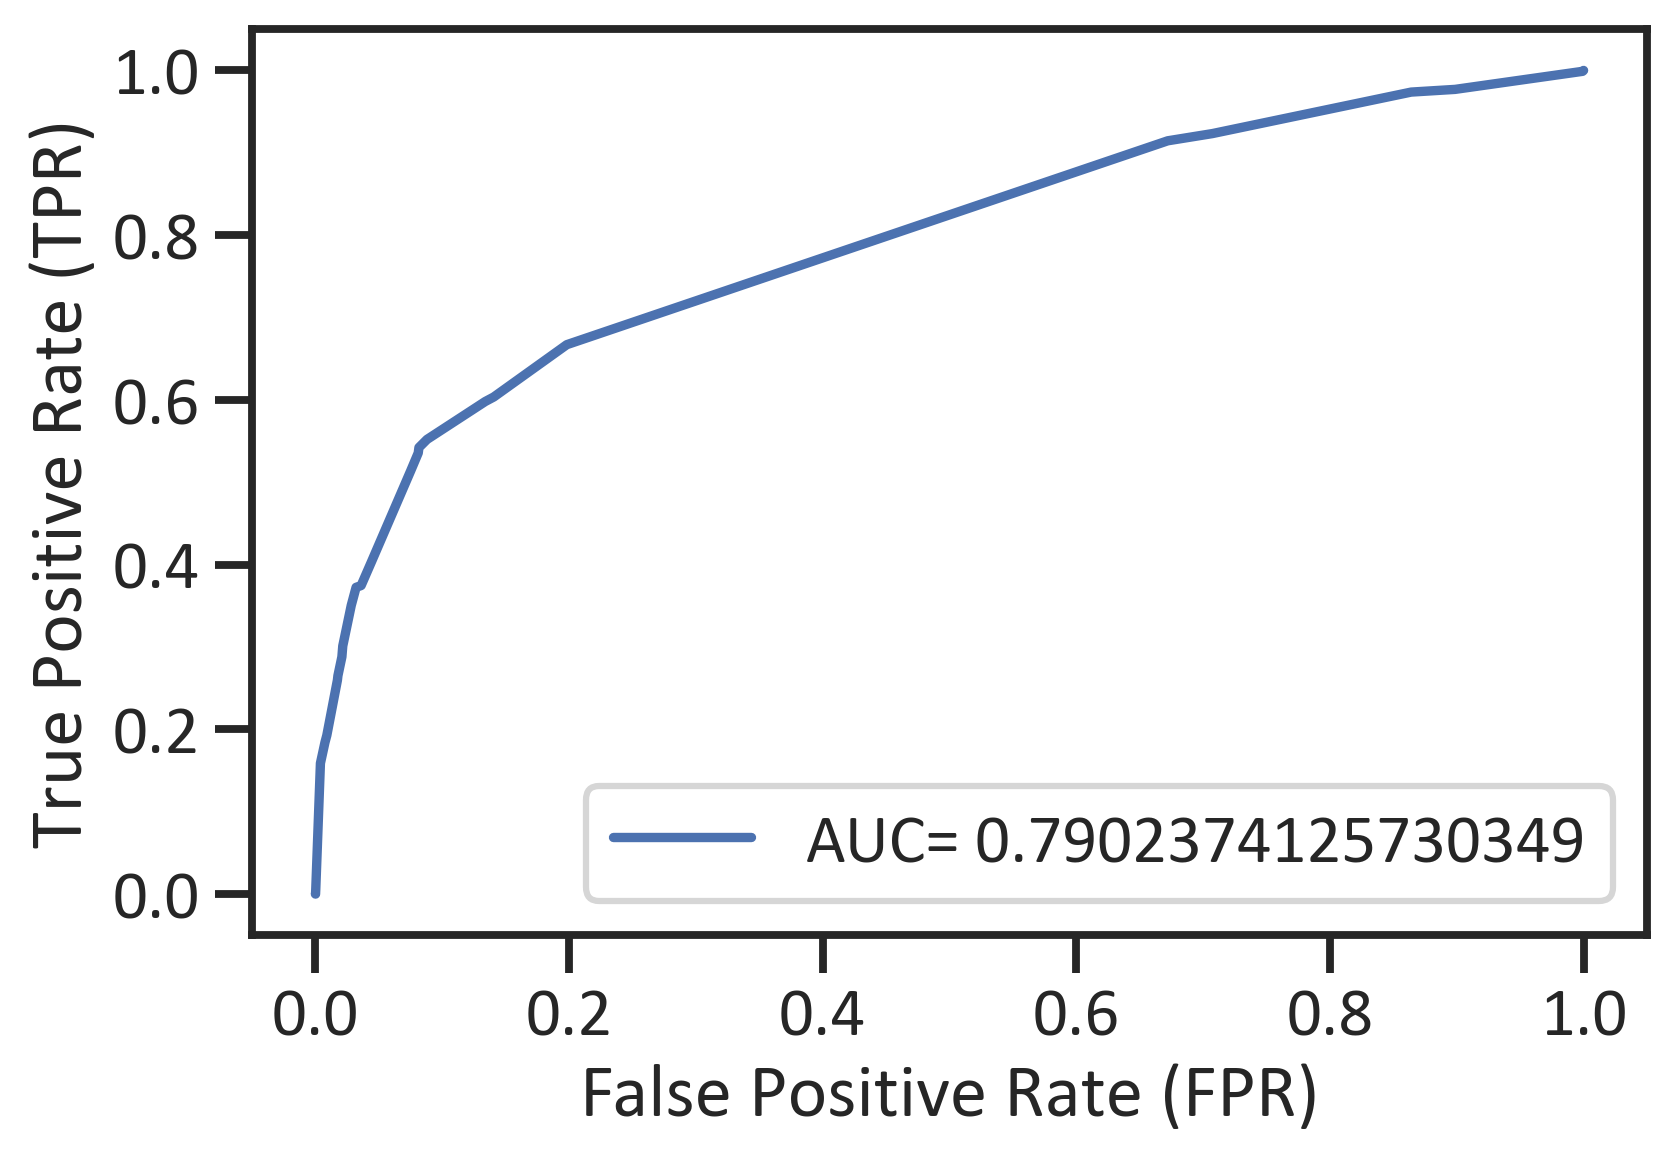

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
sns.set("talk","ticks",font_scale=1, font="Calibri")
sk_yhat_proba = sk_decision_tree_method.predict_proba(sk_standard_scaled_x_test)[::,1]
fpr_sk_decision_tree_method, tprr_sk_decision_tree_method, _ = metrics.roc_curve(y_test, sk_yhat_proba)
area_under_curve_sk_decision_tree_method = metrics.roc_auc_score(y_test, sk_yhat_proba)
plt.plot(fpr_sk_decision_tree_method, tprr_sk_decision_tree_method, label="AUC= "+ str(area_under_curve_sk_decision_tree_method))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.show()

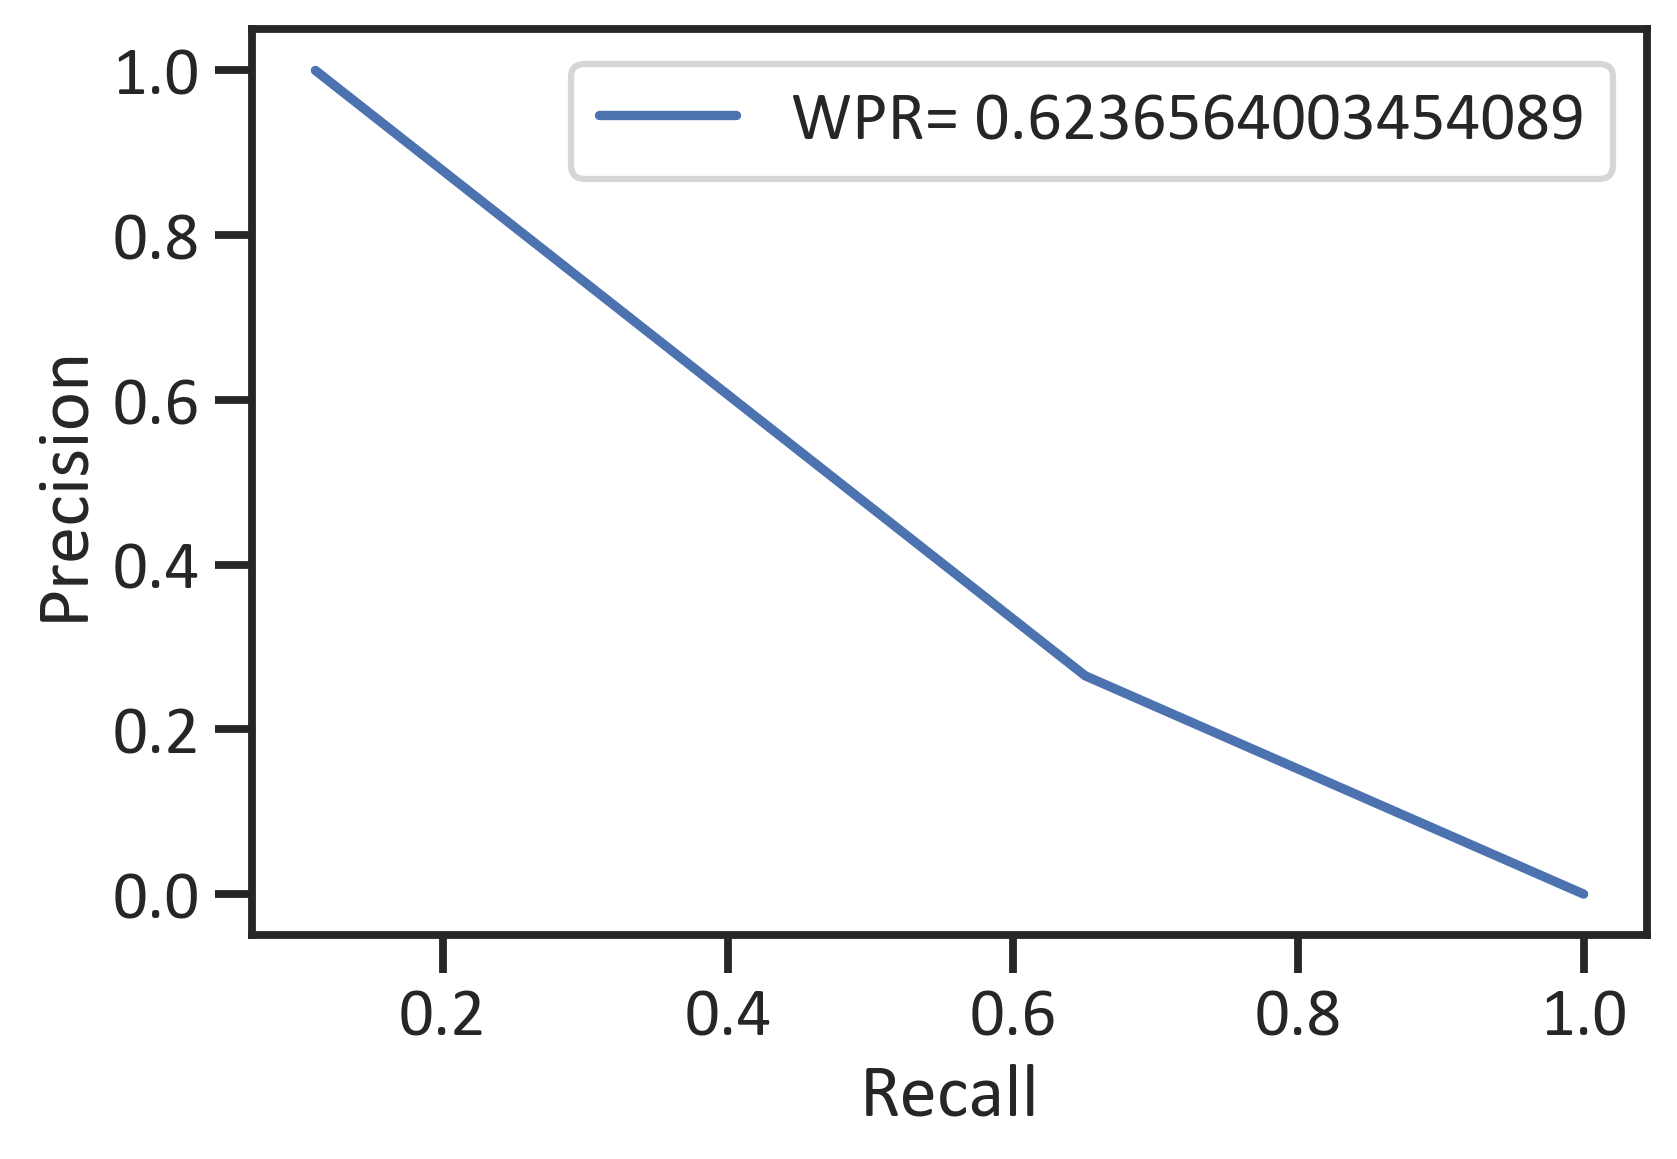

In [8]:
p_sk_decision_tree_method, r__sk_decision_tree_method, _ = metrics.precision_recall_curve(y_test, sk_yhat)
weighted_ps_sk_decision_tree_method = metrics.roc_auc_score(y_test, sk_yhat)
plt.plot(p_sk_decision_tree_method, r__sk_decision_tree_method,
         label="WPR= " +str(weighted_ps_sk_decision_tree_method))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()

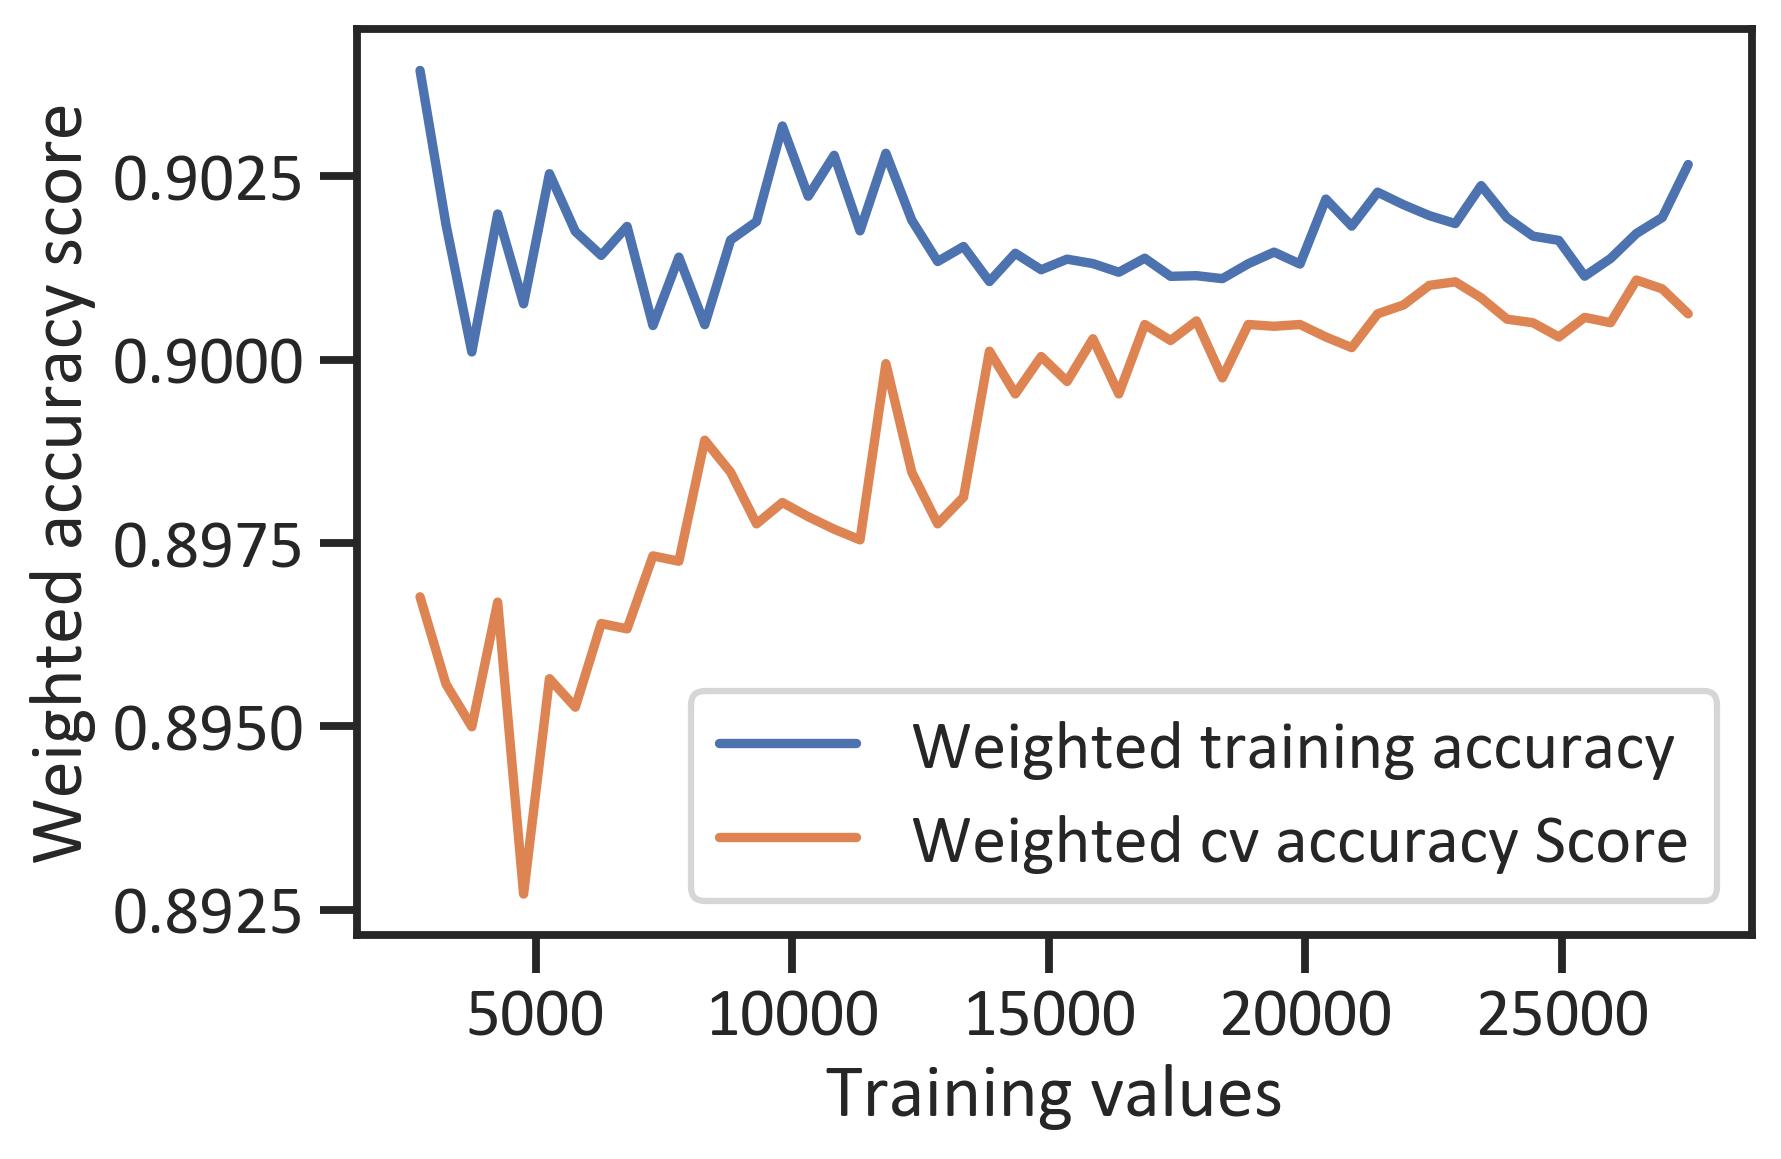

In [9]:
from sklearn.model_selection import learning_curve
train_port_sk_decision_tree_method, trainscore_sk_decision_tree_method, testscore_sk_decision_tree_method = learning_curve(sk_decision_tree_method, x, y,
                                                                                                                                        cv=3, n_jobs=-5, train_sizes=np.linspace(0.1,1.0,50))
trainscoresk_decision_tree_method_mean = np.mean(trainscore_sk_decision_tree_method, axis=1)
testscoresk_decision_tree_method_mean = np.mean(testscore_sk_decision_tree_method, axis=1)
plt.plot(train_port_sk_decision_tree_method, trainscoresk_decision_tree_method_mean, label="Weighted training accuracy")
plt.plot(train_port_sk_decision_tree_method, testscoresk_decision_tree_method_mean, label="Weighted cv accuracy Score")
plt.xlabel("Training values")
plt.ylabel("Weighted accuracy score")
plt.legend(loc="best")
plt.show()

# XGBoost in Action

In [10]:
from xgboost import XGBClassifier
xgb_gradient_boosting_method = XGBClassifier()
xgb_gradient_boosting_method.fit(sk_standard_scaled_x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
sk_yhat_xgb_gradient_boosting_method = xgb_gradient_boosting_method.predict(sk_standard_scaled_x_test)
xgb_gradient_boosting_method_assessment_2 = pd.DataFrame(metrics.classification_report(y_test, sk_yhat_xgb_gradient_boosting_method, output_dict=True)).transpose()
xgb_gradient_boosting_method_assessment_2

,precision,recall,f1-score,support
0,0.913410,0.976382,0.943847,7325.000000
1,0.575980,0.257393,0.355791,913.000000
accuracy,0.896698,0.896698,0.896698,0.896698
macro avg,0.744695,0.616888,0.649819,8238.000000
weighted avg,0.876013,0.896698,0.878674,8238.000000


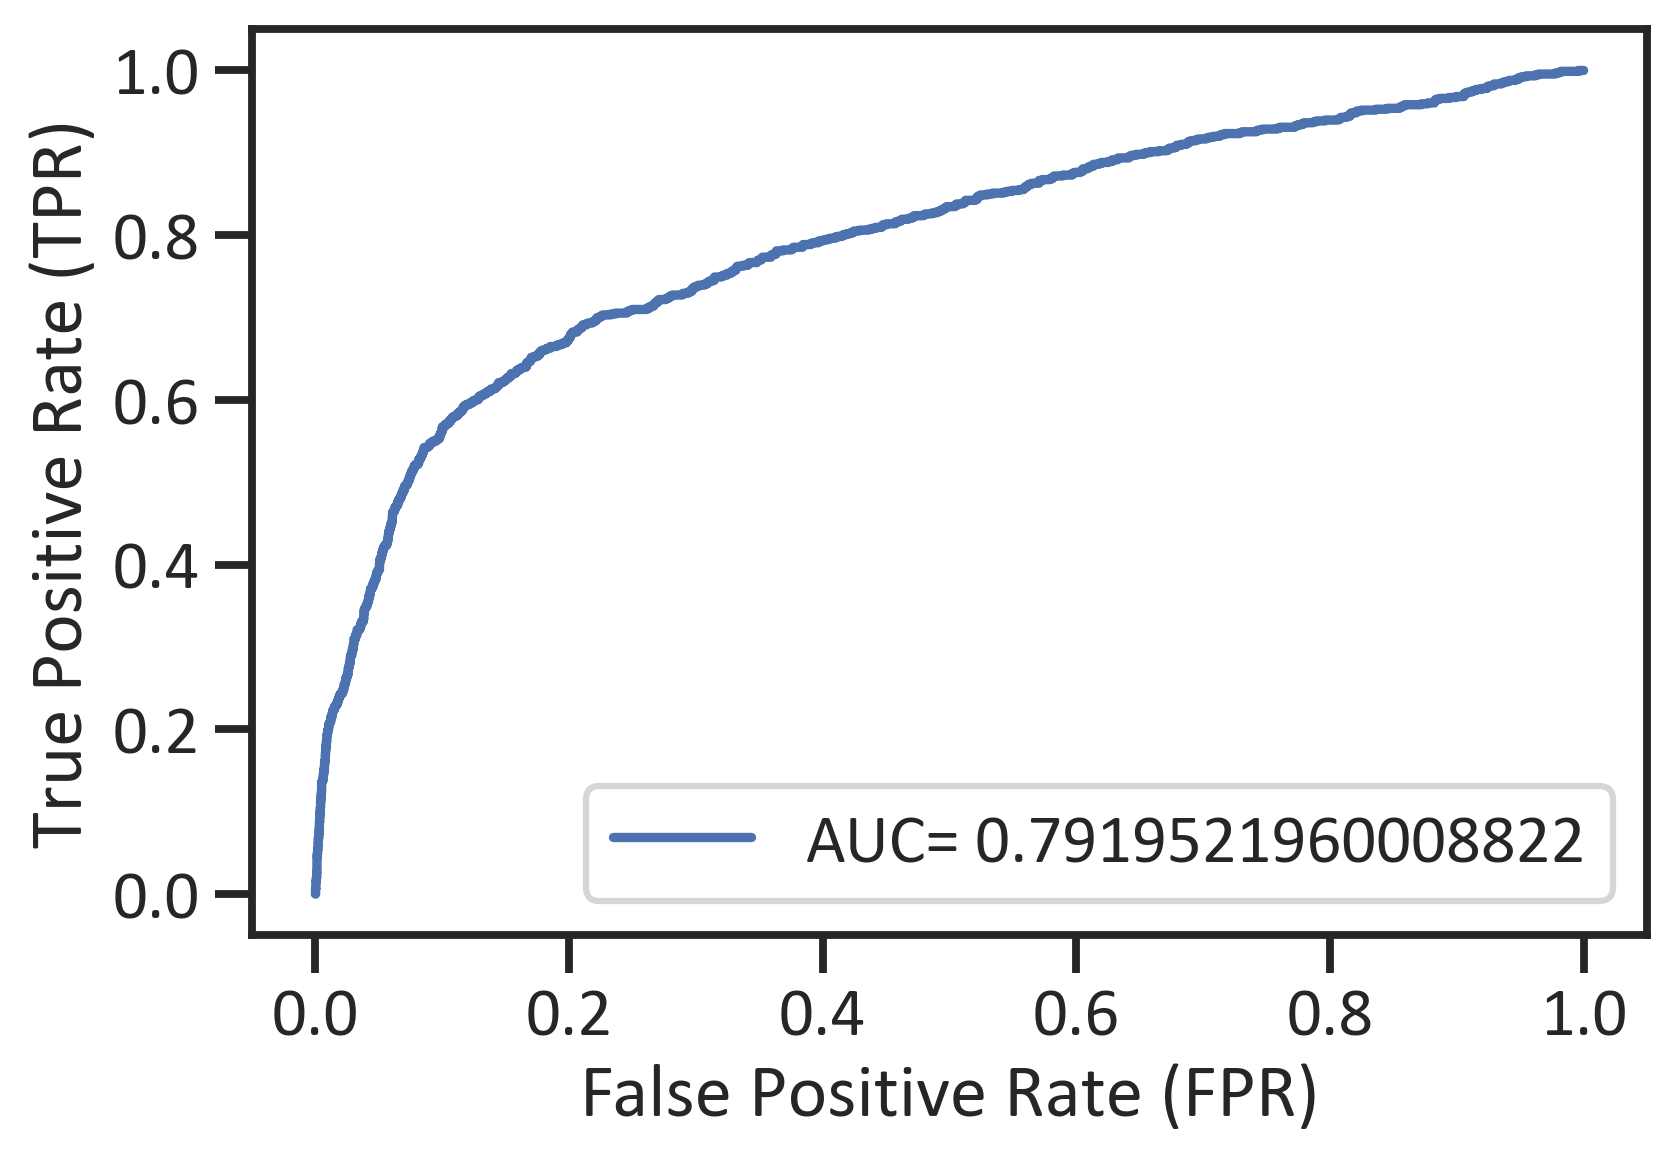

In [12]:
yhat_proba_xgb_gradient_boosting_method = xgb_gradient_boosting_method.predict_proba(sk_standard_scaled_x_test)[::,1]
fpr_xgb_gradient_boosting_method, tprr_xgb_gradient_boosting_method, _ = metrics.roc_curve(y_test, yhat_proba_xgb_gradient_boosting_method)
area_under_curve_xgb_gradient_boosting_method = metrics.roc_auc_score(y_test, yhat_proba_xgb_gradient_boosting_method)
plt.plot(fpr_xgb_gradient_boosting_method, tprr_xgb_gradient_boosting_method, label="AUC= "+ str(area_under_curve_xgb_gradient_boosting_method))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="best")
plt.show()

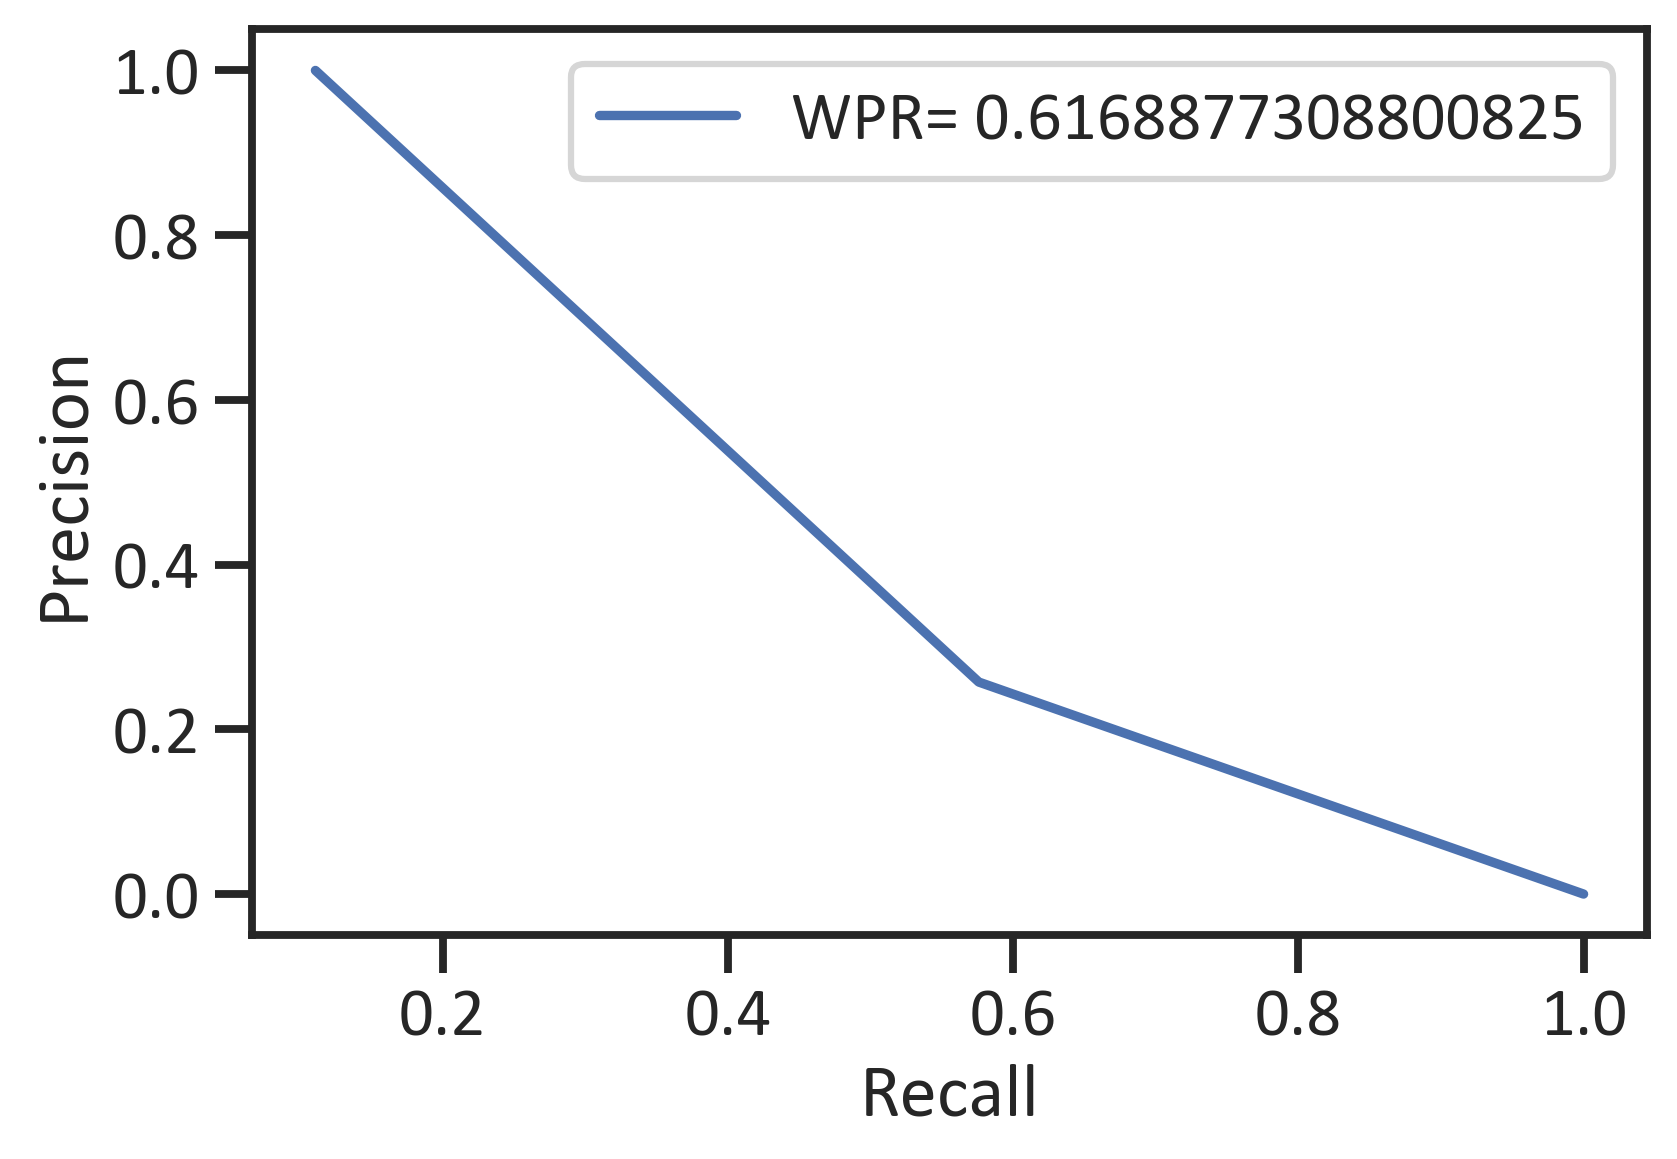

In [13]:
p_xgb_gradient_boosting_method, r__xgb_gradient_boosting_method, _ = metrics.precision_recall_curve(y_test, sk_yhat_xgb_gradient_boosting_method)
weighted_ps_xgb_gradient_boosting_method = metrics.roc_auc_score(y_test, sk_yhat_xgb_gradient_boosting_method)
plt.plot(p_xgb_gradient_boosting_method, r__xgb_gradient_boosting_method,
         label="WPR= " +str(weighted_ps_xgb_gradient_boosting_method))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.show()

# PySpark in Action

In [14]:
import findspark as initiate_pyspark
initiate_pyspark.init("C:\Spark\spark-3.0.0-bin-hadoop2.7")

In [15]:
from pyspark import SparkConf
pyspark_configuration = SparkConf().setAppName("gradient_boosting_method").setMaster("local")

In [16]:
from pyspark import SparkContext
pyspark_context = SparkContext(conf=pyspark_configuration)

In [17]:
from pyspark.sql import SparkSession
pyspark_session = SparkSession(pyspark_context)

In [18]:
pyspark_initial_data = pyspark_session.createDataFrame(initial_data)

In [19]:
x_list = list(initial_data.iloc[::, 0:17].columns)
y_list = str(initial_data.columns[-1])
from pyspark.ml.feature import VectorAssembler
pyspark_data_columns = x_list
pyspark_vector_assembler = VectorAssembler(inputCols=pyspark_data_columns, outputCol="variables")
pyspark_data = pyspark_vector_assembler.transform(pyspark_initial_data)

In [20]:
(pyspark_training_data, pyspark_test_data) = pyspark_data.randomSplit([.8,.2])

In [21]:
from pyspark.ml.classification import GBTClassifier
pyspark_gradient_boosting_method = GBTClassifier(labelCol = y_list, featuresCol = pyspark_data.columns[-1])
pyspark_gradient_boosting_method_fitted = pyspark_gradient_boosting_method.fit(pyspark_training_data)

In [22]:
pyspark_yhat = pyspark_gradient_boosting_method_fitted.transform(pyspark_test_data)

# H2O in Action

In [23]:
import h2o as initialize_h2o
initialize_h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 40 mins
H2O_cluster_timezone:,Africa/Harare
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,"1 year, 1 month and 2 days !!!"
H2O_cluster_name:,H2O_from_python_i5_lenov_lg8kjd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.975 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [24]:
h2o_data = initialize_h2o.H2OFrame(initial_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [25]:
x_list = list(initial_data.iloc[::, 0:17].columns)
y_list = str(initial_data.columns[-1])
y = y_list
x = h2o_data.col_names
x.remove(y_list)

In [26]:
h2o_training_data, h2o_validation_data, h2o_test_data = h2o_data.split_frame(ratios=[.8,.1])

In [27]:
from h2o.estimators import H2OGradientBoostingEstimator
h2o_gradient_boosting_method = H2OGradientBoostingEstimator(nfolds=3)
h2o_gradient_boosting_method.train(x = x, y = y, training_frame = h2o_training_data, validation_frame = h2o_validation_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [28]:
h2o_gradient_boosting_method_history = h2o_gradient_boosting_method.scoring_history()
h2o_gradient_boosting_method_history.head(5)

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-08-24 04:04:30,10.384 sec,0.0,0.317003,0.200981,0.100491,0.311883,0.197762,0.097271
1,,2021-08-24 04:04:30,10.496 sec,1.0,0.309924,0.196310,0.096053,0.305219,0.193472,0.093159
2,,2021-08-24 04:04:30,10.586 sec,2.0,0.304085,0.192122,0.092468,0.299762,0.189611,0.089857
3,,2021-08-24 04:04:30,10.659 sec,3.0,0.299238,0.188351,0.089543,0.295379,0.186199,0.087249
4,,2021-08-24 04:04:30,10.745 sec,4.0,0.295198,0.184939,0.087142,0.291736,0.183116,0.085110
